## Experiments with basis functions for polygons

In [73]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "svg"
plt.rcParams["text.usetex"] = False # Plotting the global model is much much faster with tex fonts turned off

In [74]:
# New plan:
# - Find mesh perimeter
# + Expand mesh perimeter out using shapely
# - Overlay a uniform grid of points
# - Assign NaN to all of those outside of buffered mesh
# - Triangulate
# - Calculate smoothing matrix / del2 laplacian operator: https://www.generacodice.com/en/articolo/1033997/discrete-laplacian-(del2-equivalent)-in-python
# - Calculate n_eigs smallest eigenvalues from sparse matrix
# - Interpolate these eigenvectors onto TDE sources
# - Build decoupled checkerboard matrix
# - Solve slip coupling problem

# Bonus: Boundary conditions
# Apply exponential tapers to sides?

In [93]:
from shapely import geometry
polygon_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
polygon = geometry.Polygon(polygon_vertices)
buffer_width = 0.25
polygon_buffer = polygon.buffer(buffer_width)

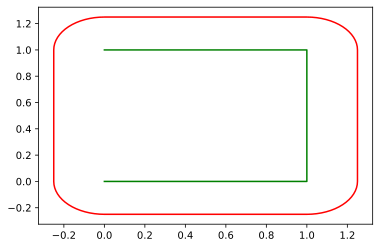

In [96]:
# Get buffer coordinates
buffer_x = np.array(polygon_buffer.boundary.xy[0])
buffer_y = np.array(polygon_buffer.boundary.xy[1])
plt.plot(polygon_vertices[:, 0], polygon_vertices[:, 1], "-g")
plt.plot(buffer_x, buffer_y, "-r")


In [98]:
polygon_vertices.shape

(4, 2)